In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Read the file train.csv into Python and print a few rows.

In [51]:
train = pd.read_csv('train.csv')
#.sort_values(by=['Age'])
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
train.shape

(891, 12)

Calculate the number of surviving/non-surviving passengers and display it as a bar plot.

AxesSubplot(0.125,0.125;0.775x0.755)


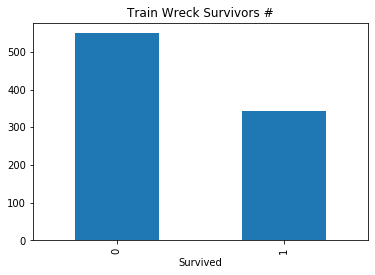

In [4]:
train2 = train.groupby('Survived')['PassengerId'].count().plot.bar(title="Train Wreck Survivors #")
print(train2)

Calculate the proportion of surviving 1st class passengers with regards to the total number of 1st class passengers.

In [5]:
first = train[train.Pclass == 1]
print(first)

     PassengerId  Survived  Pclass  \
305          306         1       1   
297          298         0       1   
445          446         1       1   
802          803         1       1   
435          436         1       1   
..           ...       ...     ...   
766          767         0       1   
793          794         0       1   
815          816         0       1   
839          840         1       1   
849          850         1       1   

                                             Name     Sex    Age  SibSp  \
305                Allison, Master. Hudson Trevor    male   0.92      1   
297                  Allison, Miss. Helen Loraine  female   2.00      1   
445                     Dodge, Master. Washington    male   4.00      0   
802           Carter, Master. William Thornton II    male  11.00      1   
435                     Carter, Miss. Lucile Polk  female  14.00      1   
..                                            ...     ...    ...    ...   
766               

In [6]:
first_total = first.groupby(['Pclass'])['PassengerId'].count()
print(first_total)

Pclass
1    216
Name: PassengerId, dtype: int64


In [7]:
first_survived = first[first.Survived == 1]['PassengerId'].count()
#groupby('PassengerId')
#first[first.Survived == 1].groupby('PassengerId').count()
#first.groupby(['Pclass','Survived'])['PassengerId'].count()
#first_survived = first['Survived'].value_counts()
#['Survived'=1]
print(first_survived)

136


In [8]:
first_sur_rat = first_survived / first_total
print(first_sur_rat)

Pclass
1    0.62963
Name: PassengerId, dtype: float64


Create a bar plot with separate bars for male/female passengers and 1st/2nd/3rd class passengers.

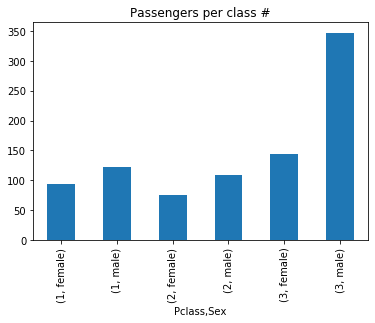

In [9]:
pclass = train.groupby(['Pclass','Sex'])['PassengerId'].count().plot.bar(title="Passengers per class #")

Create a histogram showing the age distribution of passengers. Compare surviving/non-surviving passengers.

[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bc27410>]]


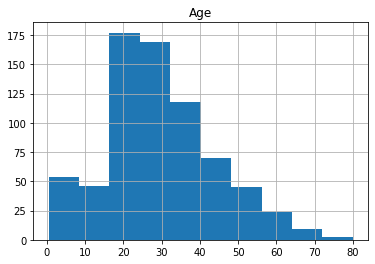

In [10]:
hist = train.hist(column='Age')
#plt.axvline(hist.mean(), color='k', linestyle='dashed', linewidth=1)
print(hist)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bcea9d0>]]


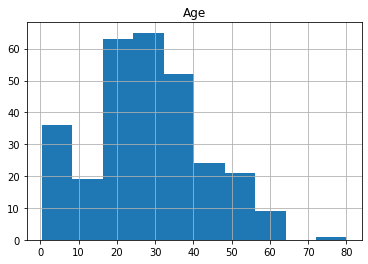

In [11]:
hist_sur = train[train.Survived == 1].hist(column='Age')
print(hist_sur)

[[<matplotlib.axes._subplots.AxesSubplot object at 0x1a1bd8fb50>]]


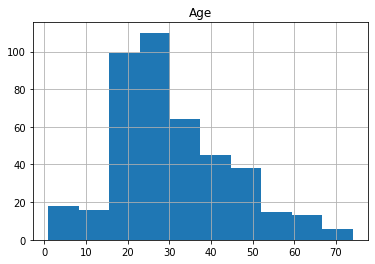

In [12]:
hist_not = train[train.Survived == 0].hist(column='Age')
print(hist_not)

In [13]:
hist_all = train[train.Survived == 0]('Age')+ train[train.Survived == 1]('Age')
hist_all.plot.hist()

TypeError: 'DataFrame' object is not callable

Calculate the average age for survived and drowned passengers separately.

In [14]:
age_sur = train[train.Survived == 1]['Age'].mean()
print(age_sur)

28.343689655172415


In [15]:
age_not = train[train.Survived == 0]['Age'].mean()
print(age_not)

30.62617924528302


Replace missing age values by the mean age

In [16]:
age_mean = train['Age'].mean()
print(age_mean)

29.69911764705882


In [17]:
train3 = train['Age'].isna()
print(train3)

803    False
755    False
644    False
469    False
78     False
       ...  
859     True
863     True
868     True
878     True
888     True
Name: Age, Length: 891, dtype: bool


In [23]:
train4 = train['Age'].replace({np.NaN:train['Age'].mean()}) #inplace=True)
print(train4)

803     0.420000
755     0.670000
644     0.750000
469     0.750000
78      0.830000
         ...    
859    29.699118
863    29.699118
868    29.699118
878    29.699118
888    29.699118
Name: Age, Length: 891, dtype: float64


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


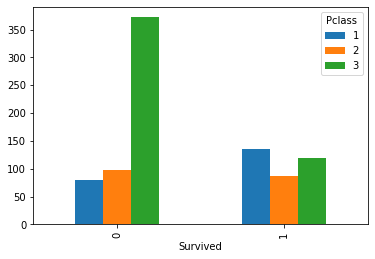

In [87]:
table = train[['Pclass','Survived','PassengerId']].groupby(['Survived','Pclass'])['PassengerId'].count().unstack()
table1 = table.plot.bar()
print(table3)

Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


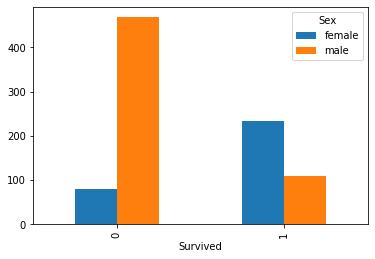

In [88]:
table = train[['Sex','Survived','PassengerId']].groupby(['Survived','Sex'])['PassengerId'].count().unstack()
table1 = table.plot.bar()
print(table3)